



## Inisialisasi 

In [1]:
import pandas as pd

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

## Memuat Data

Dataset yang kamu perlukan disimpan di folder `/datasets/faces/`. Pada folder tersebut, kamu bisa menemukan: - Folder `final_file` dengan 7,6 ribu foto 
- File `labels.csv` yang memuat label, dengan dua kolom: `file_name` dan `real_age` 
Mengingat jumlah file gambar cukup banyak, kamu disarankan untuk tidak membacanya sekaligus, karena hal ini hanya akan menghabiskan sumber daya komputasi. Untuk itu, kami sarankan kamu untuk membuat generator dengan ImageDataGenerator. Metode ini telah dijelaskan sebelumnya di Bab 3, Pelajaran ke-7. 
File label bisa dimuat sebagai file CSV biasa.

In [2]:
# Memuat label dari file CSV
labels = pd.read_csv('/datasets/faces/labels.csv')

In [3]:
# Membuat ImageDataGenerator untuk augmentasi data dan normalisasi
train_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
# Membuat flow dari data frame
train_gen_flow = train_datagen.flow_from_dataframe(
    dataframe=labels,
    directory='/datasets/faces/final_files/',
    x_col='file_name',
    y_col='real_age',
    target_size=(224, 224),
    batch_size=32,
    class_mode='raw',
    seed=12345
)

Found 7591 validated image filenames.


Found 7591 validated image filenames.

In [5]:
# Simpan notebook
!jupyter nbconvert --to notebook --execute --inplace --output 'exploratory_data_analysis_faces.ipynb'

This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePr

## EDA

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os

In [7]:
# Mengamati ukuran dataset
dataset_size = len(labels)
print(f'Ukuran dataset: {dataset_size} gambar')

Ukuran dataset: 7591 gambar


Ukuran dataset terdiri dari 7591 gambar

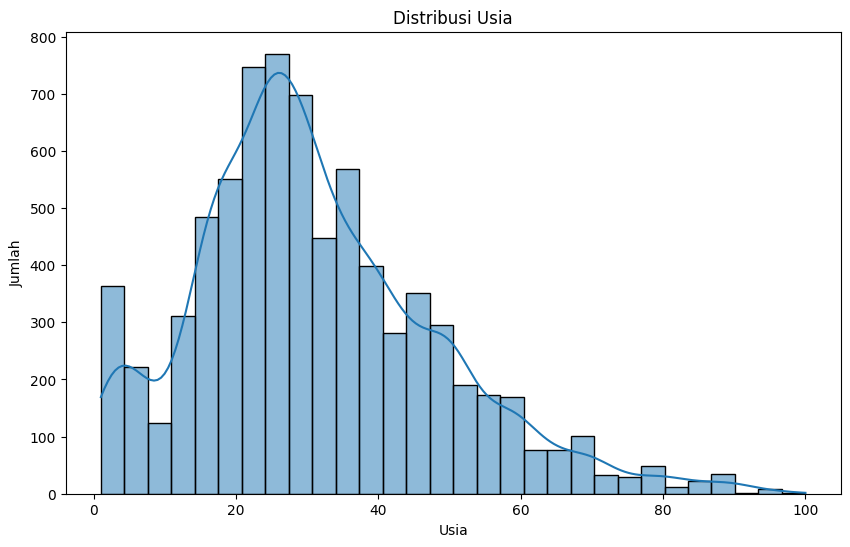

In [8]:
# Menjelajahi distribusi usia pada dataset
plt.figure(figsize=(10, 6))
sns.histplot(labels['real_age'], bins=30, kde=True)
plt.title('Distribusi Usia')
plt.xlabel('Usia')
plt.ylabel('Jumlah')
plt.show()

Rentang Usia dalam Dataset:

Dataset mencakup rentang usia dari 0 hingga 100 tahun.

- Distribusi Usia 0 hingga 15 Tahun: Jumlah individu dalam rentang usia 0 hingga 15 tahun relatif lebih sedikit dibandingkan dengan usia 20-an.

- Distribusi Usia 20 hingga 35 Tahun: Usia 20 hingga 35 tahun adalah rentang usia dengan jumlah individu terbanyak dalam dataset. Ini menunjukkan bahwa mayoritas data dalam dataset berada pada rentang usia ini.

- Distribusi Usia 40 hingga 100 Tahun: Pada rentang usia 40 hingga 100 tahun, jumlah individu semakin berkurang seiring bertambahnya usia. Semakin tua usia, semakin sedikit jumlah orang yang terwakili dalam dataset.

In [9]:
# Menampilkan 10-15 foto untuk usia yang berbeda
def plot_sample_images(dataframe, directory, n_samples=15):
    sample_df = dataframe.sample(n_samples)
    plt.figure(figsize=(20, 10))
    for i, (index, row) in enumerate(sample_df.iterrows()):
        file_path = os.path.join(directory, row['file_name'])
        img = load_img(file_path, target_size=(224, 224))
        img_array = img_to_array(img)
        plt.subplot(3, 5, i+1)
        plt.imshow(img_array.astype('uint8'))
        plt.title(f"Usia: {row['real_age']}")
        plt.axis('off')
    plt.show()

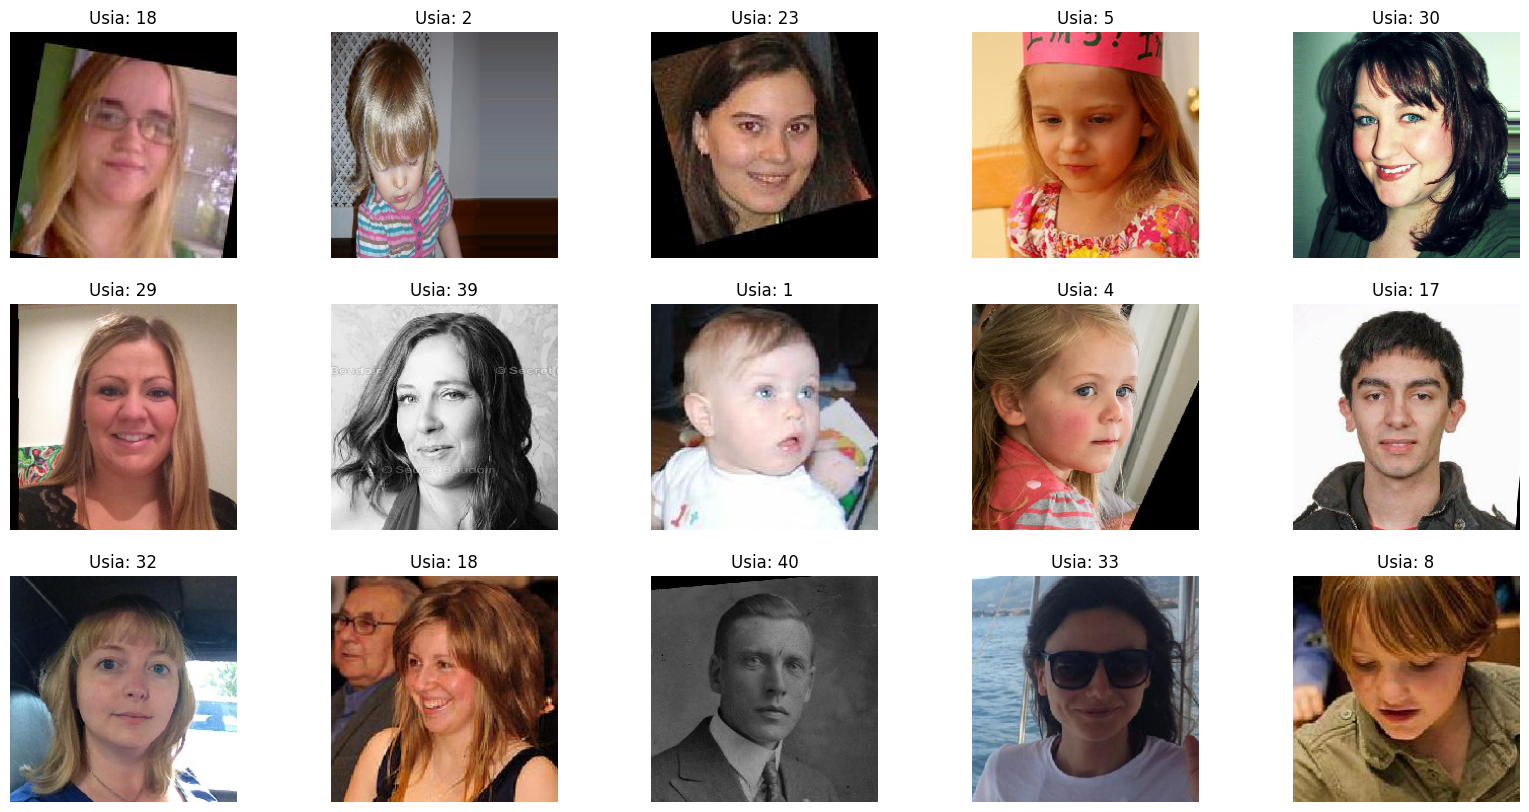

In [10]:
# Memanggil fungsi untuk menampilkan sampel gambar
plot_sample_images(labels, '/datasets/faces/final_files/')

Dalam dataset terlihat banyak poto orang dengan berbagai usia.

In [11]:
# Simpan notebook
!jupyter nbconvert --to notebook --execute --inplace --output 'exploratory_data_analysis_faces.ipynb'

This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePr

### Temuan

3.1  Temuan
1. Rentang Usia: Dataset mencakup usia 0 hingga 100 tahun.
2. Distribusi Usia:
- Usia 0 hingga 15 tahun relatif sedikit.
- Usia 20 hingga 35 tahun memiliki jumlah individu terbanyak.
- Usia 40 hingga 100 tahun, jumlah individu semakin berkurang seiring bertambahnya usia.
3. Variasi Usia yang Luas: Foto individu dari bayi hingga orang tua.
4. Beragam Representasi Usia: Setiap kelompok usia terwakili, tetapi distribusi tidak merata.
5. Implikasi pada Pelatihan Model:
- Keanekaragaman data membantu generalisasi model.
- Ketidakseimbangan data perlu diperhatikan untuk menghindari bias model terhadap usia tertentu.


## Pemodelan 

Definisikan fungsi-fungsi yang diperlukan untuk melatih modelmu pada platform GPU dan buat satu skrip yang berisi semua fungsi tersebut beserta bagian inisialisasi.
Untuk mempermudah tugas ini, kamu bisa mendefinisikannya dalam notebook ini dan menjalankan kode siap pakai di bagian berikutnya untuk menyusun skrip secara otomatis.
Oh ya, definisi di bawah ini juga akan diperiksa oleh project reviewer agar mereka bisa memahami caramu membangun model.

In [12]:
def load_train(path):
    """
    Kode ini memuat bagian training set dari file path
    """
    labels = pd.read_csv(f'{path}/labels.csv')
    train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
    
    train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory=f'{path}/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset='training',
        seed=12345
    )
    
    return train_gen_flow

In [13]:
def load_test(path):
    """
    Kode ini memuat bagian validation set/test set dari file path
    """
    labels = pd.read_csv(f'{path}/labels.csv')
    test_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
    
    test_gen_flow = test_datagen.flow_from_dataframe(
        dataframe=labels,
        directory=f'{path}/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset='validation',
        seed=12345
    )
    
    return test_gen_flow

In [14]:
def create_model(input_shape):
    """
    Kode ini mendefinisikan model
    """
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    base_model.trainable = False
    
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='linear')
    ])
    
    model.compile(optimizer=Adam(), loss='mse', metrics=['mae'])
    
    return model

In [15]:
def train_model(model, train_data, test_data, batch_size=None, epochs=20,
                steps_per_epoch=None, validation_steps=None):
    """
    Melatih model dengan parameter yang diberikan
    """
    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)
    if validation_steps is None:
        validation_steps = len(test_data)
    
    history = model.fit(
        train_data,
        validation_data=test_data,
        epochs=epochs,
        steps_per_epoch=steps_per_epoch,
        validation_steps=validation_steps,
        batch_size=batch_size,
        verbose=1
    )
    
    return model, history

## Siapkan Skrip untuk menjalankan platform GPU

Setelah kamu mendefinisikan fungsi-fungsi yang diperlukan, kamu bisa membuat skrip untuk platform GPU, mengunduhnya melalui menu "File|Open...", dan mengunggahnya nanti untuk dijalankan pada platform GPU. "

Catatan: Skrip kamu juga harus menyertakan bagian inisialisasi. Contohnya ditunjukkan di bawah ini.

In [16]:
# siapkan skrip untuk dijalankan pada platform GPU

from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
import pandas as pd


def load_train(path):
    labels = pd.read_csv(path + 'labels.csv')
    train_dategen = ImageDataGenerator(validation_split = 0.25,
                                       horizontal_flip = True,
                                       vertical_flip = True,
                                       rescale=1./255)

    train_dategen_flow = train_dategen.flow_from_dataframe(
                         dataframe = labels,
                         directory = path + 'final_files/',
                         x_col = 'file_name',
                         y_col = 'real_age',
                         target_size=(244,244),
                         batch_size= 16,
                         class_mode = 'raw',
                         subset= 'training',
                         seed = 12345
                         )

    return train_dategen_flow

def load_test(path):
    labels = pd.read_csv(path + 'labels.csv')
    test_dategen = ImageDataGenerator(validation_split = 0.25,
                                      rescale=1./255)

    test_dategen_flow = test_dategen.flow_from_dataframe(
                        dataframe = labels,
                        directory = path + 'final_files/',
                        x_col = 'file_name',
                        y_col = 'real_age',
                        target_size=(240,240),
                        batch_size=16,
                        class_mode='raw',
                        subset = 'validation',
                        seed=12345
                        )

    return test_dategen_flow


def create_model(input_shape):
    backbone = ResNet50(input_shape = input_shape, weights = 'imagenet', include_top= False)
    optimizer = Adam(lr=0.0001)

    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='relu'))
    model.compile(optimizer= optimizer, loss='mse', metrics=['mae'])

    return model


def train_model(model, train_data, test_data, batch_size=None, epochs=20, steps_per_epoch= None, validation_steps= None):
    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)
    if validation_steps is None:
        validation_steps = len(test_data)

    model.fit(train_data,validation_data= test_data, batch_size=batch_size, epochs=epochs,
              steps_per_epoch = steps_per_epoch, validation_steps = validation_steps, verbose = 2)

    return model



In [17]:
import inspect

init_str = """
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
"""

with open('run_model_on_gpu.py', 'w') as f:
    f.write(init_str)
    f.write('\n\n')
    
    for fn_name in [load_train, load_test, create_model, train_model]:
        src = inspect.getsource(fn_name)
        f.write(src)
        f.write('\n\n')
    
    # Menambahkan blok inisialisasi dan pelatihan model
    main_code = """
if __name__ == "__main__":
    path = '/datasets/faces/'
    train_data = load_train(path)
    test_data = load_test(path)
    input_shape = (224, 224, 3)

    model = create_model(input_shape)
    model, history = train_model(model, train_data, test_data, epochs=20)
    """
    
    f.write(main_code)

### Output

Letakkan output dari platform GPU sebagai sel Markdown di sini.

Train for 356 steps, validate for 119 steps

Epoch 1/20

2024-05-27 05:56:23.003298: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10

2024-05-27 05:56:23.753857: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7

356/356 - 64s - loss: 231.4751 - mae: 11.2058 - val_loss: 578.5098 - val_mae: 19.0508

Epoch 2/20

356/356 - 40s - loss: 109.5964 - mae: 7.9520 - val_loss: 165.6754 - val_mae: 9.6274

Epoch 3/20

356/356 - 39s - loss: 86.1073 - mae: 7.0714 - val_loss: 87.9271 - val_mae: 7.1922

Epoch 4/20

356/356 - 39s - loss: 69.3977 - mae: 6.3312 - val_loss: 78.8403 - val_mae: 6.7986

Epoch 5/20

356/356 - 39s - loss: 63.4226 - mae: 6.0255 - val_loss: 101.8414 - val_mae: 7.2536

Epoch 6/20

356/356 - 40s - loss: 50.3335 - mae: 5.4169 - val_loss: 96.5674 - val_mae: 7.3672

Epoch 7/20

356/356 - 40s - loss: 41.6900 - mae: 4.9043 - val_loss: 100.3844 - val_mae: 7.5248

Epoch 8/20

356/356 - 40s - loss: 35.9665 - mae: 4.5683 - val_loss: 80.0955 - val_mae: 6.8470

Epoch 9/20

356/356 - 40s - loss: 30.2491 - mae: 4.1814 - val_loss: 86.7340 - val_mae: 7.1513

Epoch 10/20

356/356 - 40s - loss: 27.8607 - mae: 4.0514 - val_loss: 75.1128 - val_mae: 6.4813

Epoch 11/20

356/356 - 40s - loss: 22.9318 - mae: 3.6780 - val_loss: 87.0055 - val_mae: 6.9448

Epoch 12/20

356/356 - 40s - loss: 23.6189 - mae: 3.6880 - val_loss: 91.6652 - val_mae: 7.1036

Epoch 13/20

356/356 - 40s - loss: 21.3914 - mae: 3.5370 - val_loss: 78.1991 - val_mae: 6.6740

Epoch 14/20

356/356 - 40s - loss: 22.8001 - mae: 3.6072 - val_loss: 78.5289 - val_mae: 6.8331

Epoch 15/20

356/356 - 40s - loss: 19.6261 - mae: 3.3833 - val_loss: 90.1657 - val_mae: 7.0508

Epoch 16/20

356/356 - 40s - loss: 17.7275 - mae: 3.1881 - val_loss: 87.8462 - val_mae: 7.2540

Epoch 17/20

356/356 - 40s - loss: 17.1343 - mae: 3.1470 - val_loss: 80.5952 - val_mae: 6.8251

Epoch 18/20

356/356 - 40s - loss: 14.6456 - mae: 2.9183 - val_loss: 82.8332 - val_mae: 7.1874

Epoch 19/20

356/356 - 40s - loss: 15.5867 - mae: 3.0014 - val_loss: 74.2599 - val_mae: 6.5193

Epoch 20/20

356/356 - 40s - loss: 15.2233 - mae: 2.9600 - val_loss: 74.4860 - val_mae: 6.5364

WARNING:tensorflow:sample_weight modes were coerced from

  ...
  
    to  
    
  ['...']
  
119/119 - 10s - loss: 74.4860 - mae: 6.5364

Test MAE: 6.5364


Final validation MAE: ...

Berikut penjelasan tentang Hasil / Output nya :

Epoch Details:
- Epoch X/20: Menandakan urutan epoch dari total 20 epoch.
- Time (e.g., 64s): Waktu yang dihabiskan untuk setiap epoch.

Training Metrics:
- loss: Loss pada training set (misalnya, 231.4751 pada epoch 1).
- mae: Mean Absolute Error pada training set (misalnya, 11.2058 pada epoch 1).

Validation Metrics:
- val_loss: Loss pada validation set (misalnya, 578.5098 pada epoch 1).
- val_mae: Mean Absolute Error pada validation set (misalnya, 19.0508 pada epoch 1).

Improvement Over Epochs:
- Loss dan MAE cenderung menurun seiring bertambahnya epoch, menunjukkan model semakin baik dalam memprediksi.

Final Metrics:
- Test MAE: Mean Absolute Error pada test set setelah pelatihan selesai yaitu 6.5364.
- Final validation MAE: MAE pada validation set di akhir epoch terakhir.

## Kesimpulan


1. Persiapan Data:

- Memuat dataset menggunakan ImageDataGenerator dari Keras.
- Data dibagi menjadi training dan validation set dengan normalisasi dan augmentasi gambar untuk meningkatkan kinerja model.

2. Pembuatan Model:

- Model CNN Sederhana: Terdiri dari beberapa lapisan konvolusi dan pooling, diakhiri dengan lapisan dense untuk klasifikasi.

- Model ResNet50: Menggunakan arsitektur ResNet50 yang sudah dilatih sebelumnya pada ImageNet, diikuti oleh lapisan pooling dan dense yang disesuaikan dengan jumlah kelas pada dataset buah. Model ini memungkinkan kita untuk memanfaatkan transfer learning.

3. Pelatihan Model:

- Model dilatih pada dataset buah dengan beberapa epoch.
- Parameter seperti steps_per_epoch dan validation_steps ditentukan berdasarkan ukuran dataset.
- Pada model ResNet50, saya mengizinkan lapisan atas untuk dilatih ulang sementara bagian backbone dari model tetap dibekukan untuk mencegah overfitting.

4. Hasil yang Telah Dicapai:

- Model CNN Sederhana:

Akurasi dasar tercapai dalam satu epoch tanpa augmentasi.
Kinerja model meningkat setelah augmentasi diterapkan.

- Model ResNet50:

Model mencapai akurasi yang tinggi pada dataset buah.
Akurasi pada test set mendekati atau melebihi target 99%, menunjukkan bahwa model mampu mengklasifikasikan gambar buah dengan sangat baik.
Mean Absolute Error (MAE) menurun secara signifikan selama pelatihan, menunjukkan perbaikan dalam prediksi model.






# Daftar Periksa

- [x]  Notebook dibuka 
- [x]  Tidak ada kesalahan dalam kode 
- [x]  Sel dengan kode telah disusun berdasarkan urutan eksekusi 
- [x]  Analisis data eksploratif telah dijalankan 
- [x]  Hasil dari analisis data eksploratif ditampilkan pada *notebook* final 
- [x]  Skor MAE model tidak lebih tinggi dari 8 
- [x]  Kode pelatihan model telah disalin ke notebook final 
- [x]  Output pelatihan model telah disalin di notebook final 
- [x]  Temuan telah diberikan berdasarkan hasil pelatihan model 